# Evaluation Practice - bacth no -DS2309

# Temperature Forecast Project

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [109]:
#Loading Dataset

In [110]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [111]:
df.shape

(7752, 25)

In [112]:
#there are 7752 rows and 25 columns are present in the dataset

In [113]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [114]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [115]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [116]:
#all variables are numerical nature and only Date has object datatype
#According to question there are two target variables, they are Next_Tmax and Next_Tmin

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [118]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [119]:
#there are lots of null values or missing values in the dataset

In [120]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

In [121]:
#the percentage of missing data is less than 1% so we can remove them directly

In [122]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [123]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

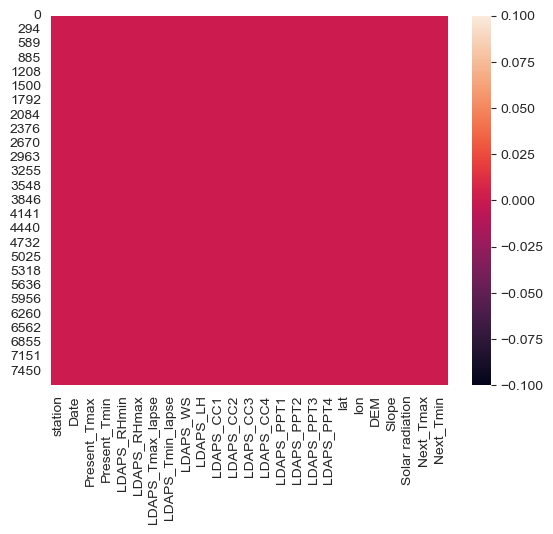

In [124]:
sns.heatmap(df.isnull())

In [125]:
#all the missing value or null have been solved in the dataset

In [126]:
#data type of Date is object so it can be coverted to date format and then seperated in day, month, year for better prediction

In [127]:
df['Date']=pd.to_datetime(df.Date,format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

In [128]:
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [129]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    15.939510     7.465999   
std         429.782561     3.111807     2.482256     8.906521     0.528635   
min        4329.520508    17.400000    11.300000     1.000000     6.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000     8.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [130]:
#the counts of the columns are same which means there is no missing values
#the mean of DEM kis grater than median so there is a skewness 
#the max is greater than 75 percentile of station,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,DEM so the data in those columns are outliers 

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64


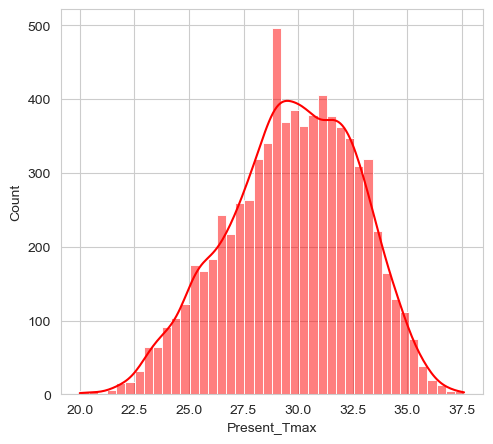

In [131]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
print(df['Present_Tmax'].value_counts())

In [132]:
#from the diagram we can say most of the Maximum temparture reading between 27.5 and 32.5

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64


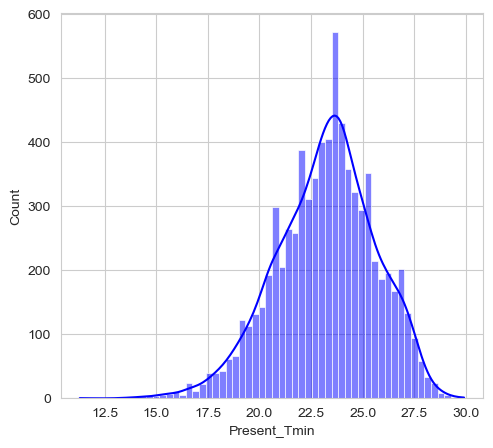

In [133]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
print(df['Present_Tmax'].value_counts())

In [134]:
#from the diagram we can say most of the Minimum temparture reading between 22.5 and 25

In [135]:
#let us find out maximum mminimum temparature happend in these period using max nad min 
print('Maximum Present Temperature in year 2013-2016 :',df.Present_Tmax.max())
print('Maximum Present Temperature in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())

print(' Minimum Present Temperature in year 2013-2016 :',df.Present_Tmin.max())
print('Minimum Present Temperature in year 2013-2016 :',df.Present_Tmin.min())
print('Average Prsent Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Maximum Present Temperature in year 2013-2016 : 37.6
Maximum Present Temperature in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
 Minimum Present Temperature in year 2013-2016 : 29.9
Minimum Present Temperature in year 2013-2016 : 11.3
Average Prsent Minimum Temperature in year 2013-2016 : 23.195809172377437


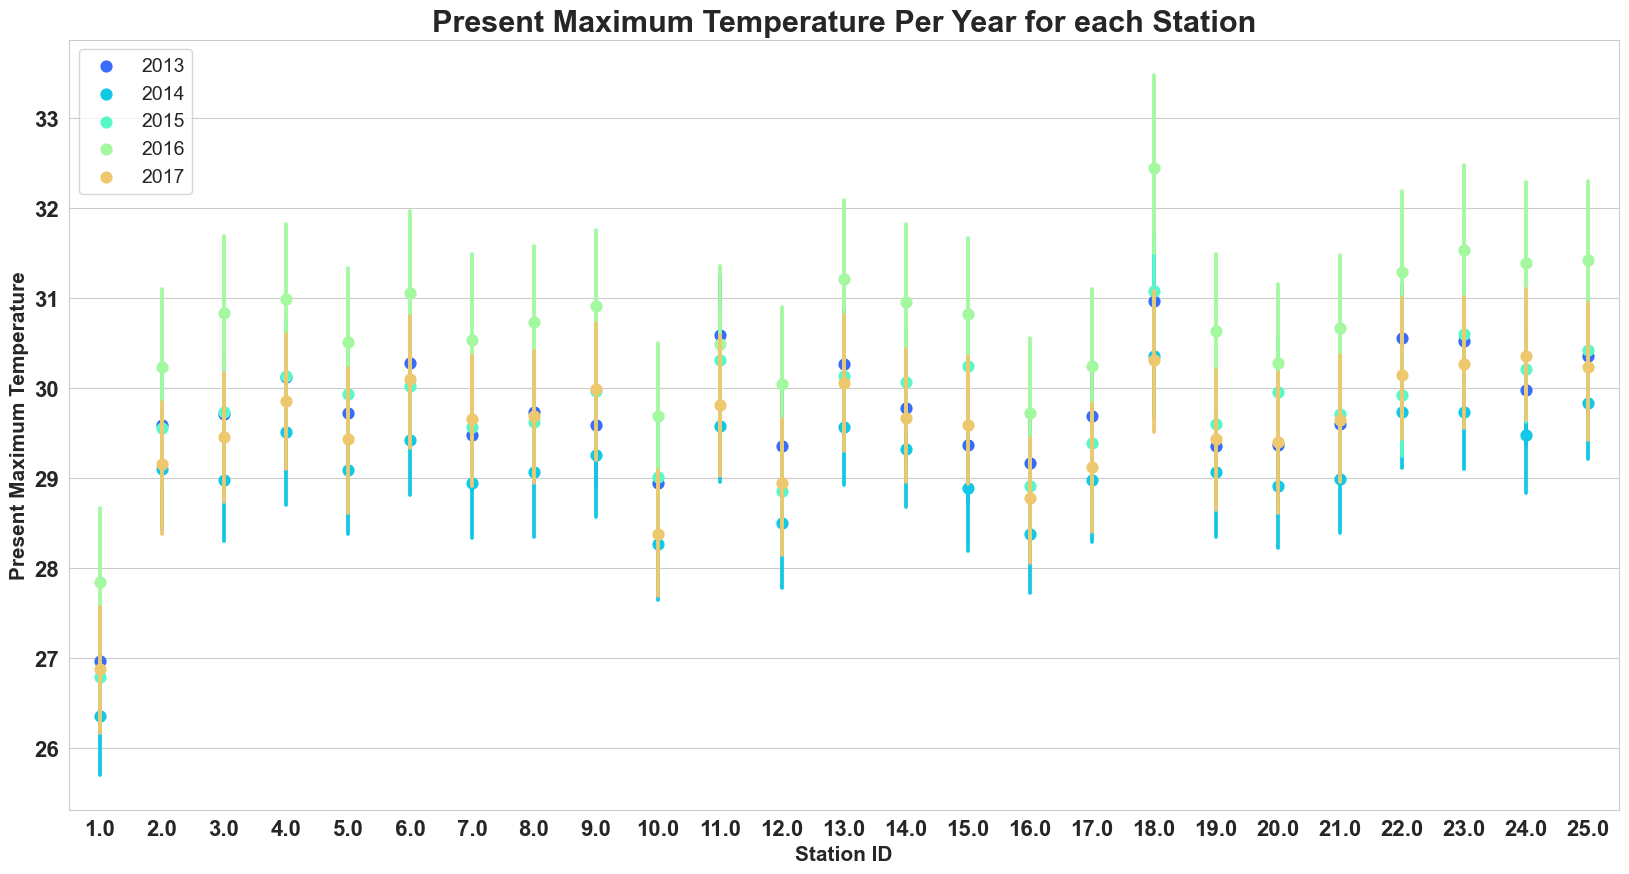

In [136]:
#realation between station and target variable Present_Tmax
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

In [137]:
#from the grqph we can ssay 2014 is the coolest year 
#all time very high temperature at station 18
#very coolest temerature at station 1 all time 


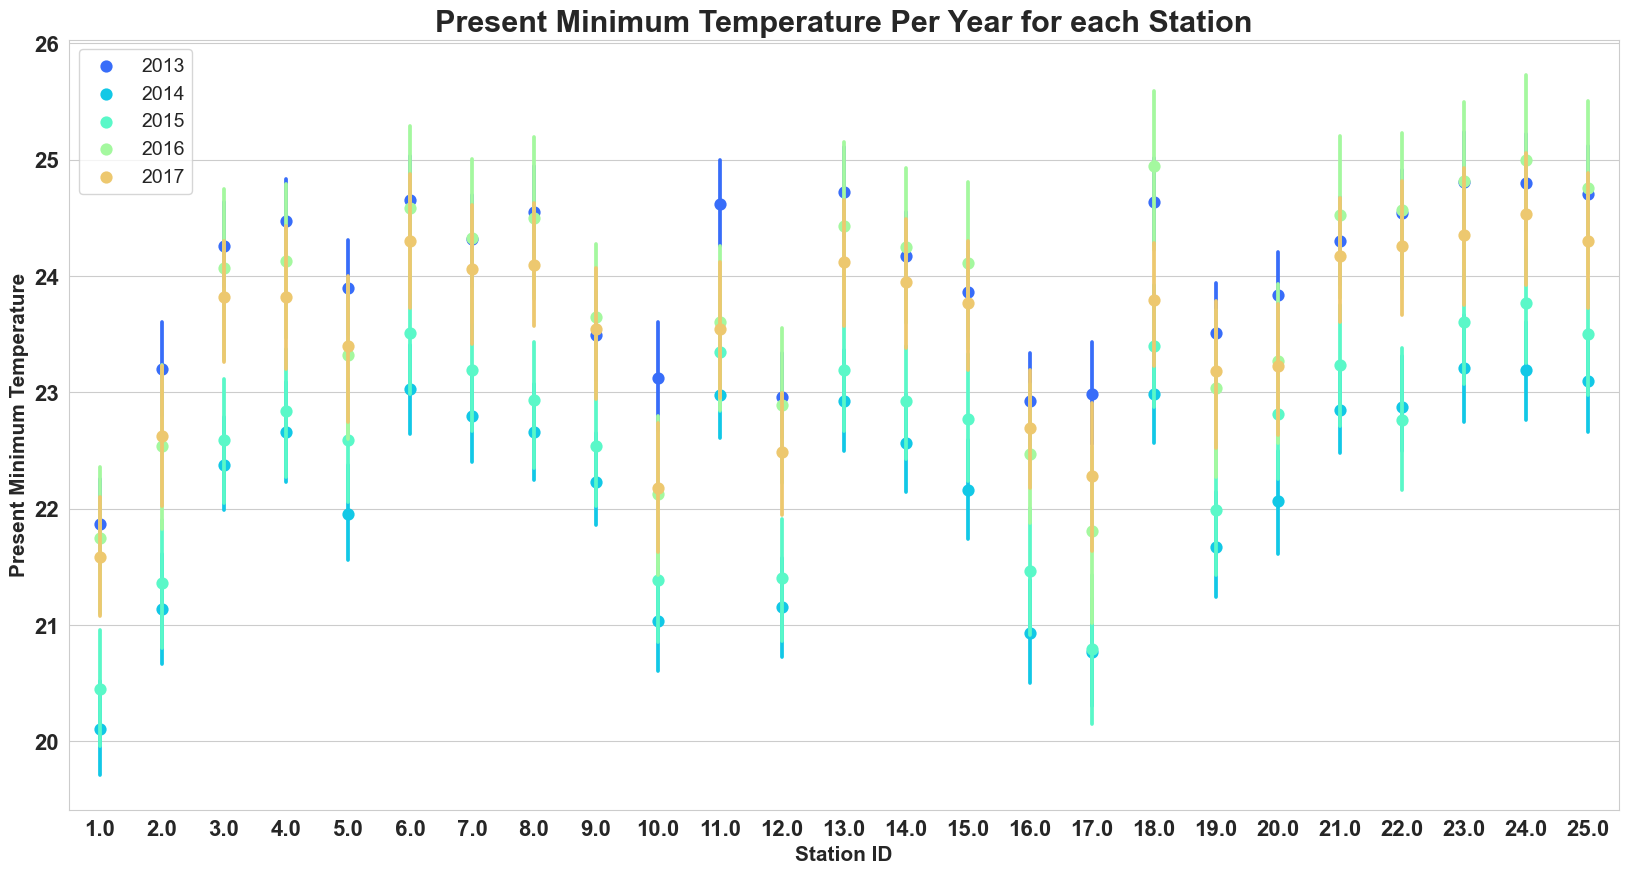

In [138]:
#realation between station and target variable Present_Tmin
#realation between station and target variable Present_Tmax
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

In [139]:
#we can say at station 1 and 17 are the minimum temperature all time
#at staion 18 is the hotest place 

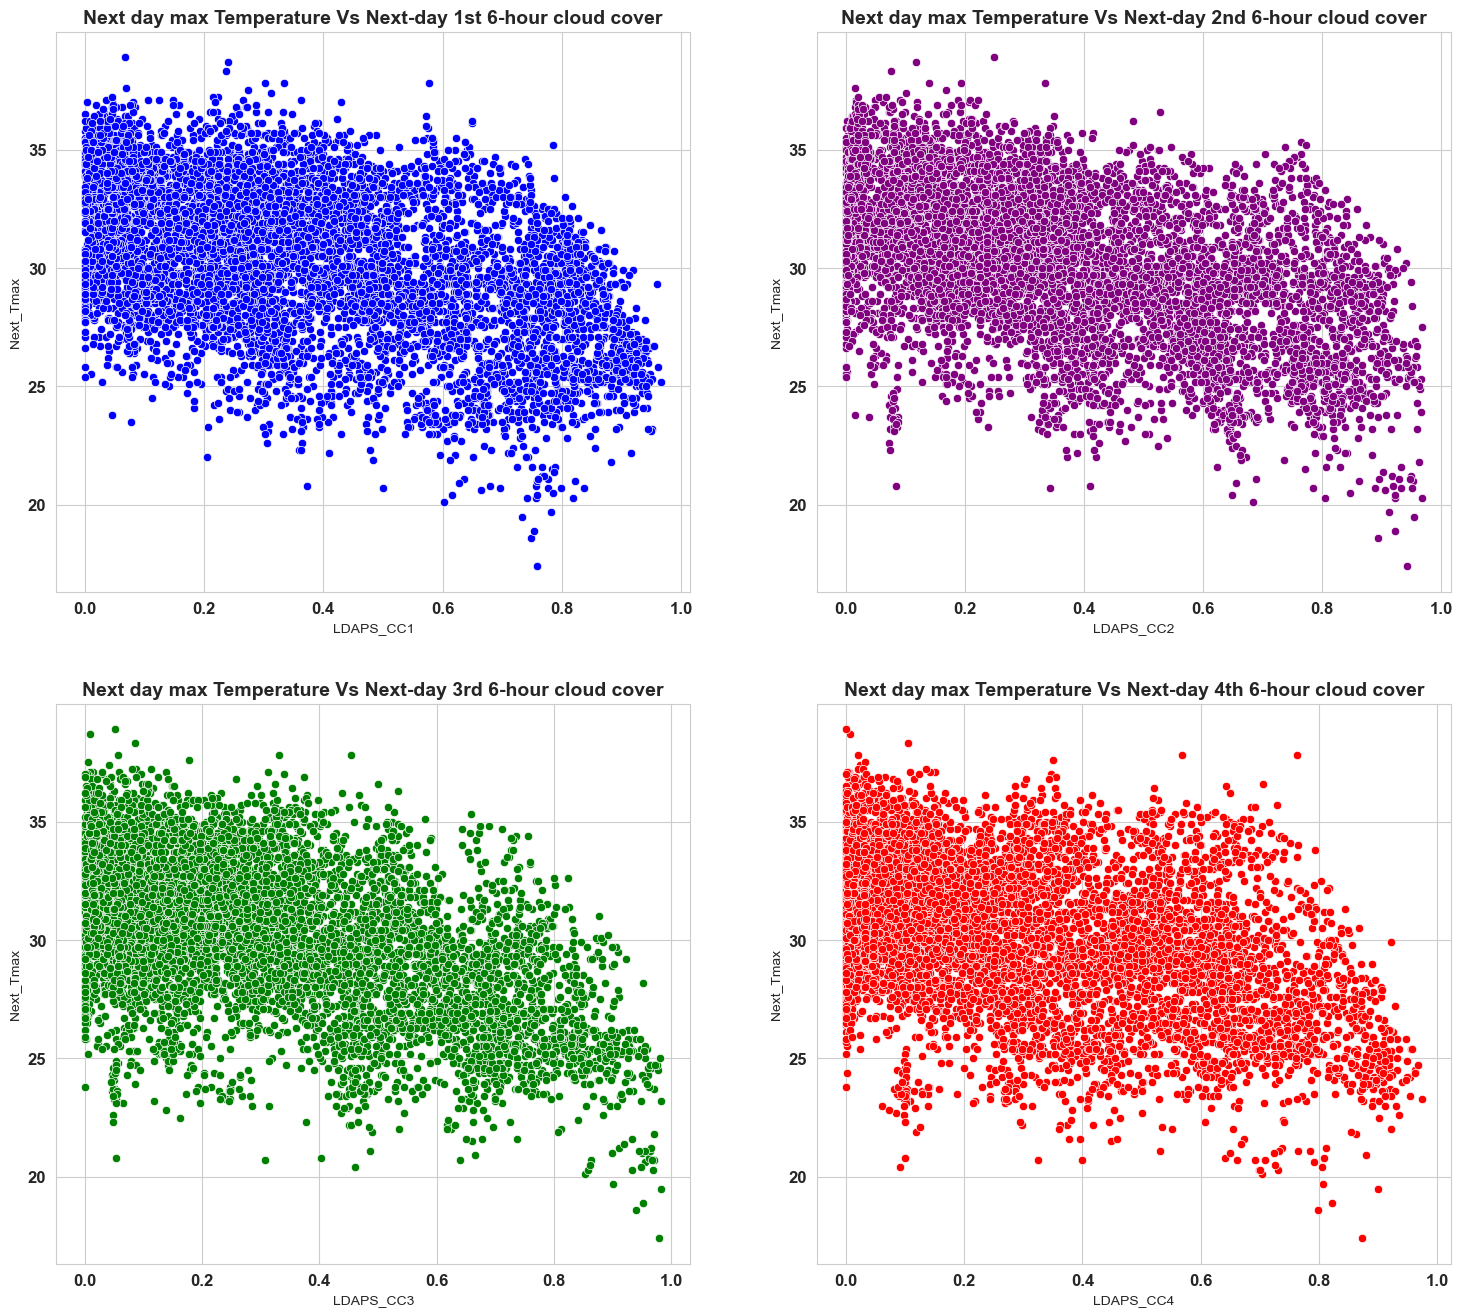

In [140]:
#Comparing Next day max temperature and next day maximum temparature 1st 6-hour cloud cover 
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs Next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs Next-day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

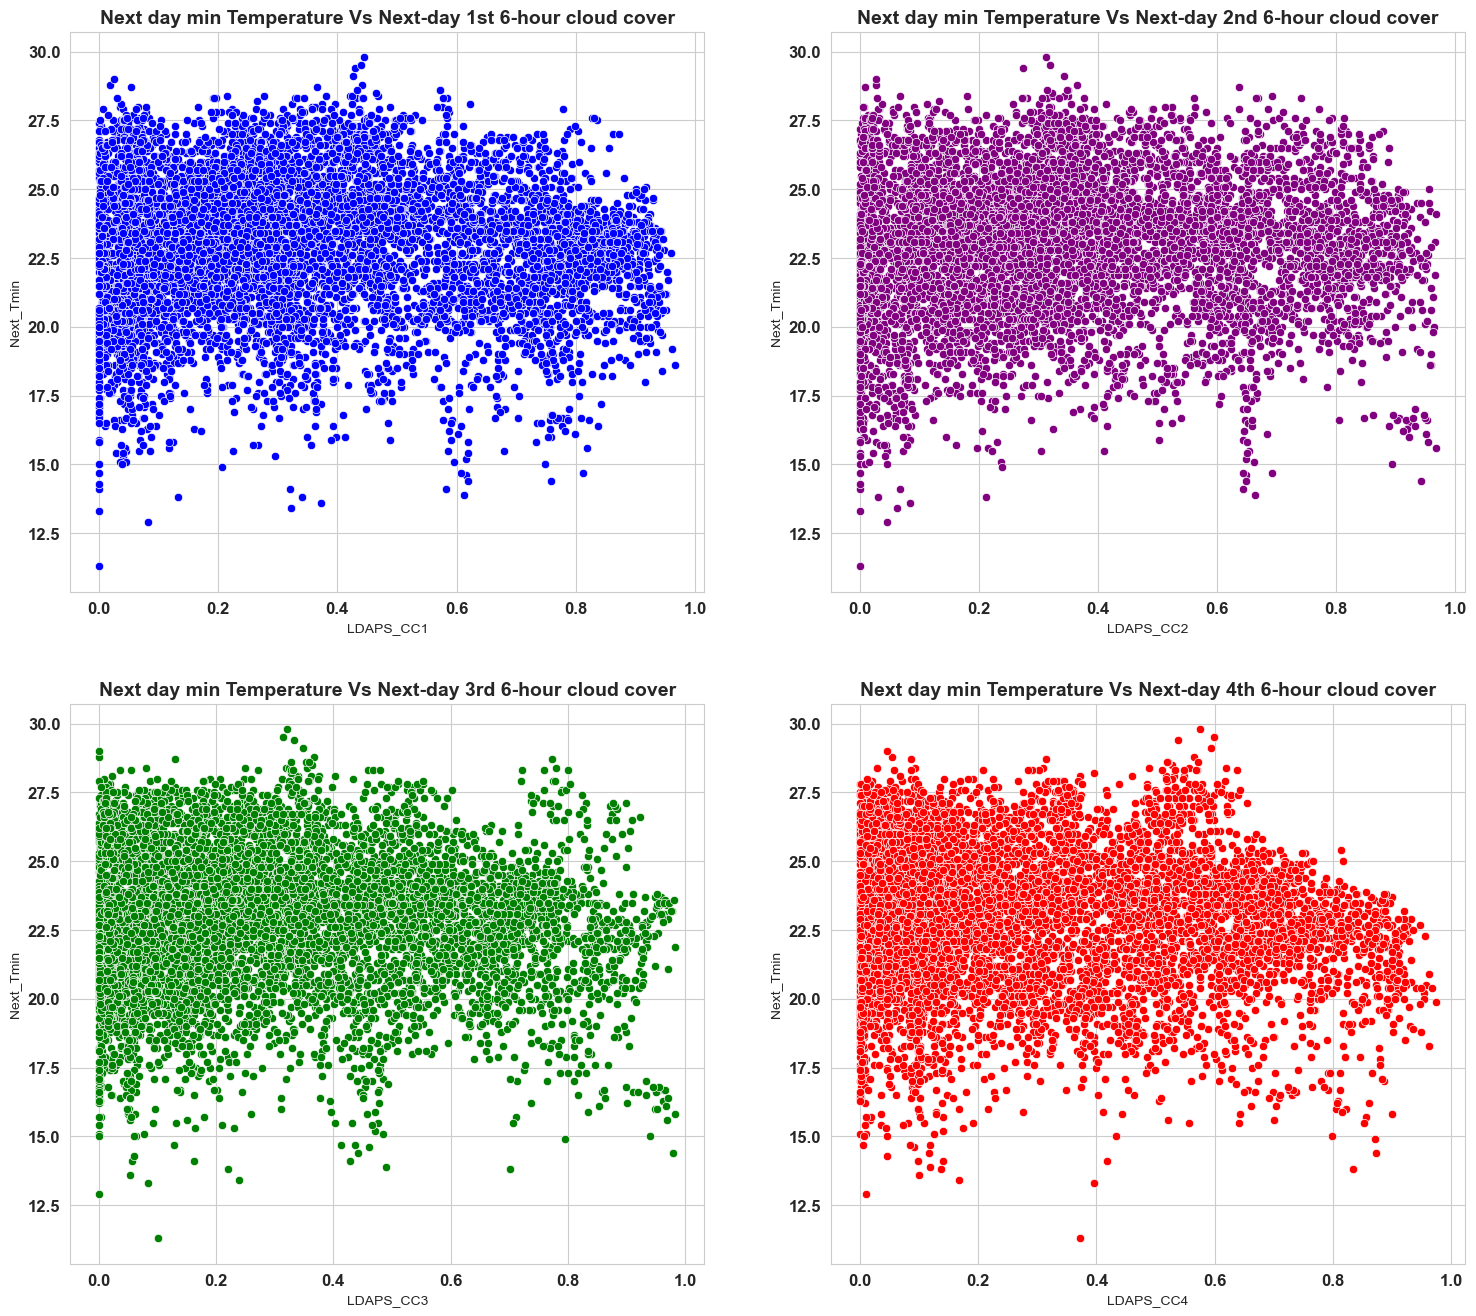

In [141]:
#Comparing Next day max temperature and next day minimum temparature 1st 6-hour cloud cover 
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs Next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Next-day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

In [142]:
#We can say that Next_Tmin donot affect by cloud cover.

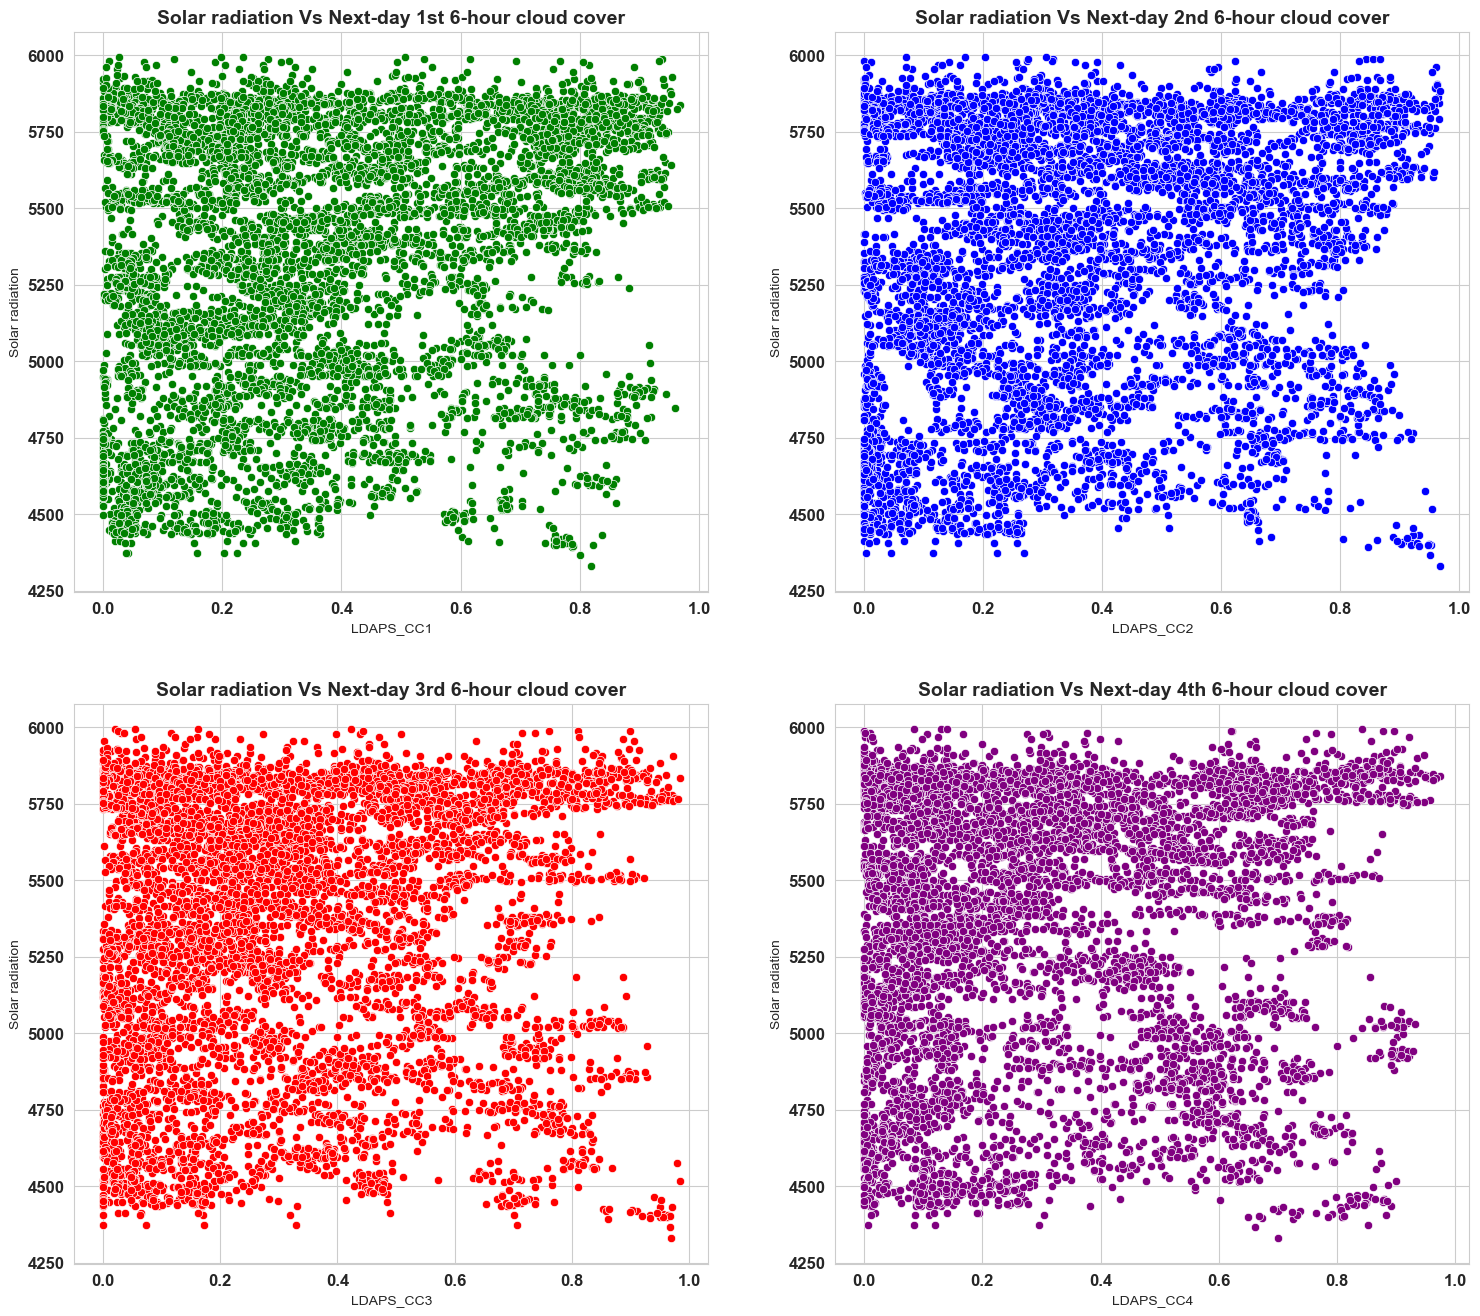

In [143]:
# Comparing Next day minimum temperature and next day average cloud cover
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.subplot(2,2,2)
plt.title('Solar radiation Vs Next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.subplot(2,2,3)
plt.title('Solar radiation Vs Next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.subplot(2,2,4)
plt.title('Solar radiation Vs Next-day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

In [144]:
#We can say that for cloud cover more than 0.6 effect high value solar radiation.

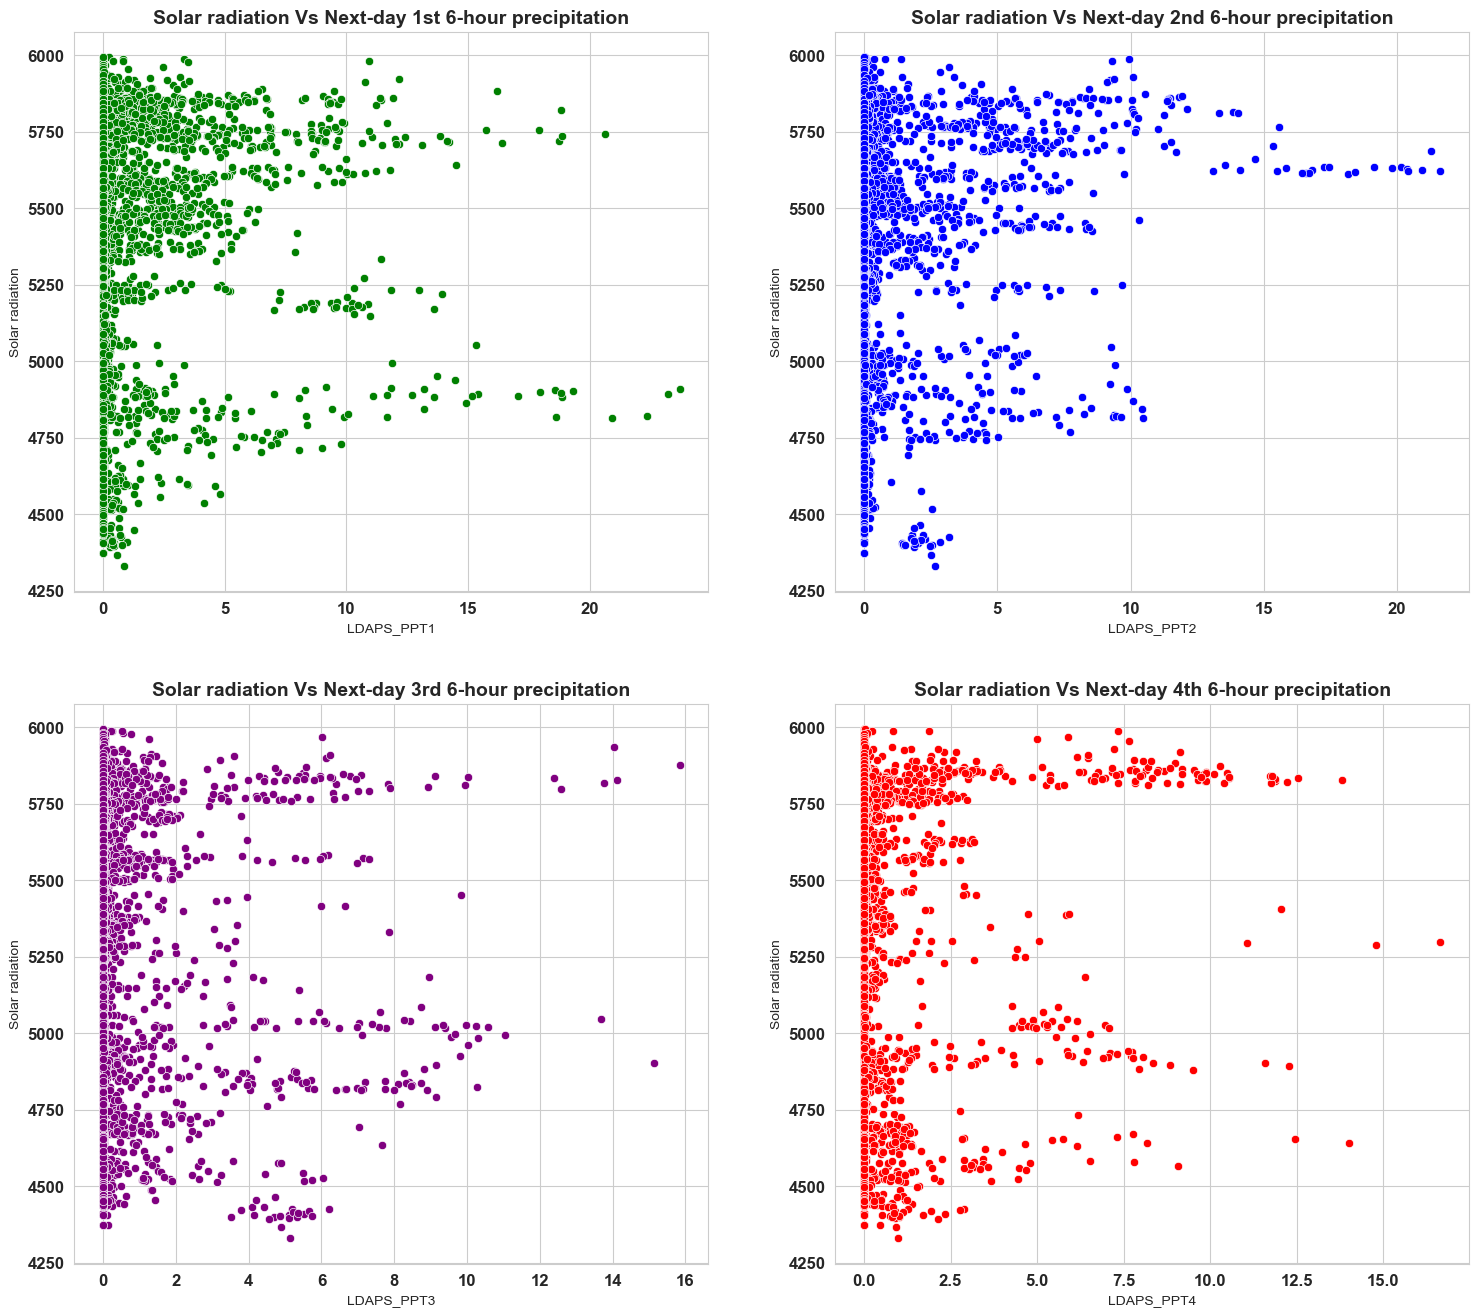

In [145]:
#Precipitation VS Solar radiation
#comparing each precipitation and solar radiation
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT1',y='Solar radiation',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.subplot(2,2,2)
plt.title('Solar radiation Vs Next-day 2nd 6-hour precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT2',y='Solar radiation',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.subplot(2,2,3)
plt.title('Solar radiation Vs Next-day 3rd 6-hour precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT3',y='Solar radiation',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.subplot(2,2,4)
plt.title('Solar radiation Vs Next-day 4th 6-hour precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT4',y='Solar radiation',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


In [146]:
#we can say that solar radiation value greater than 5500 leads to higher amount of precipitation

In [147]:
#Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year']}

In [148]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

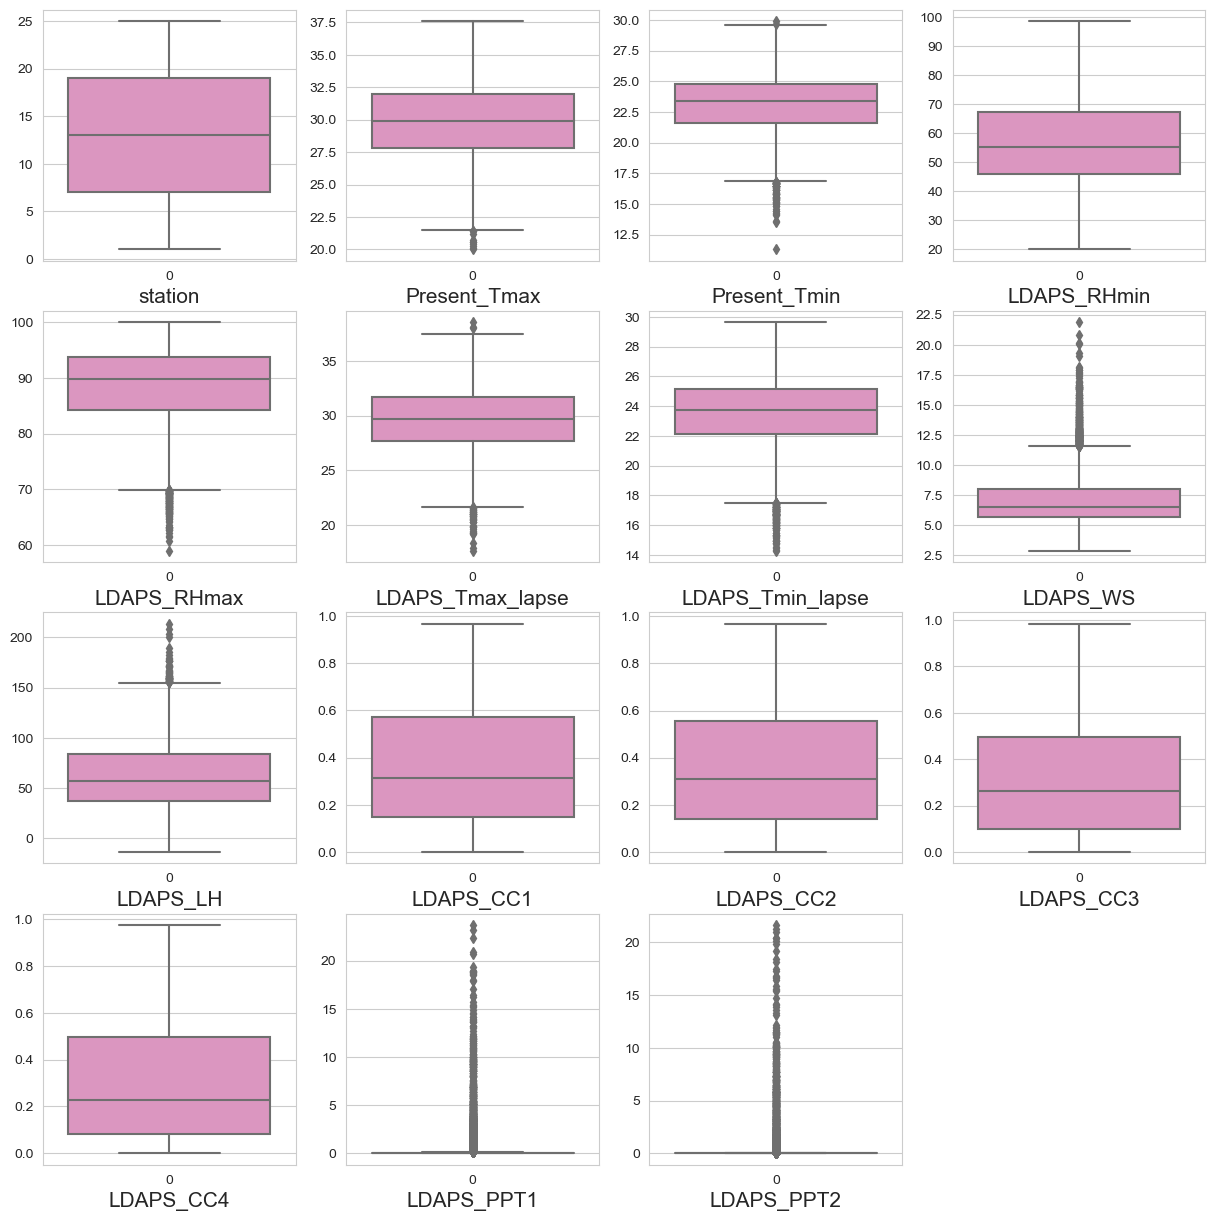

In [149]:
#CHECKING FOR OUTLIERS
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.show()

In [150]:
# From Boxplot we can see outliers exist dataset.

In [151]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


In [152]:
df=df1.copy() 

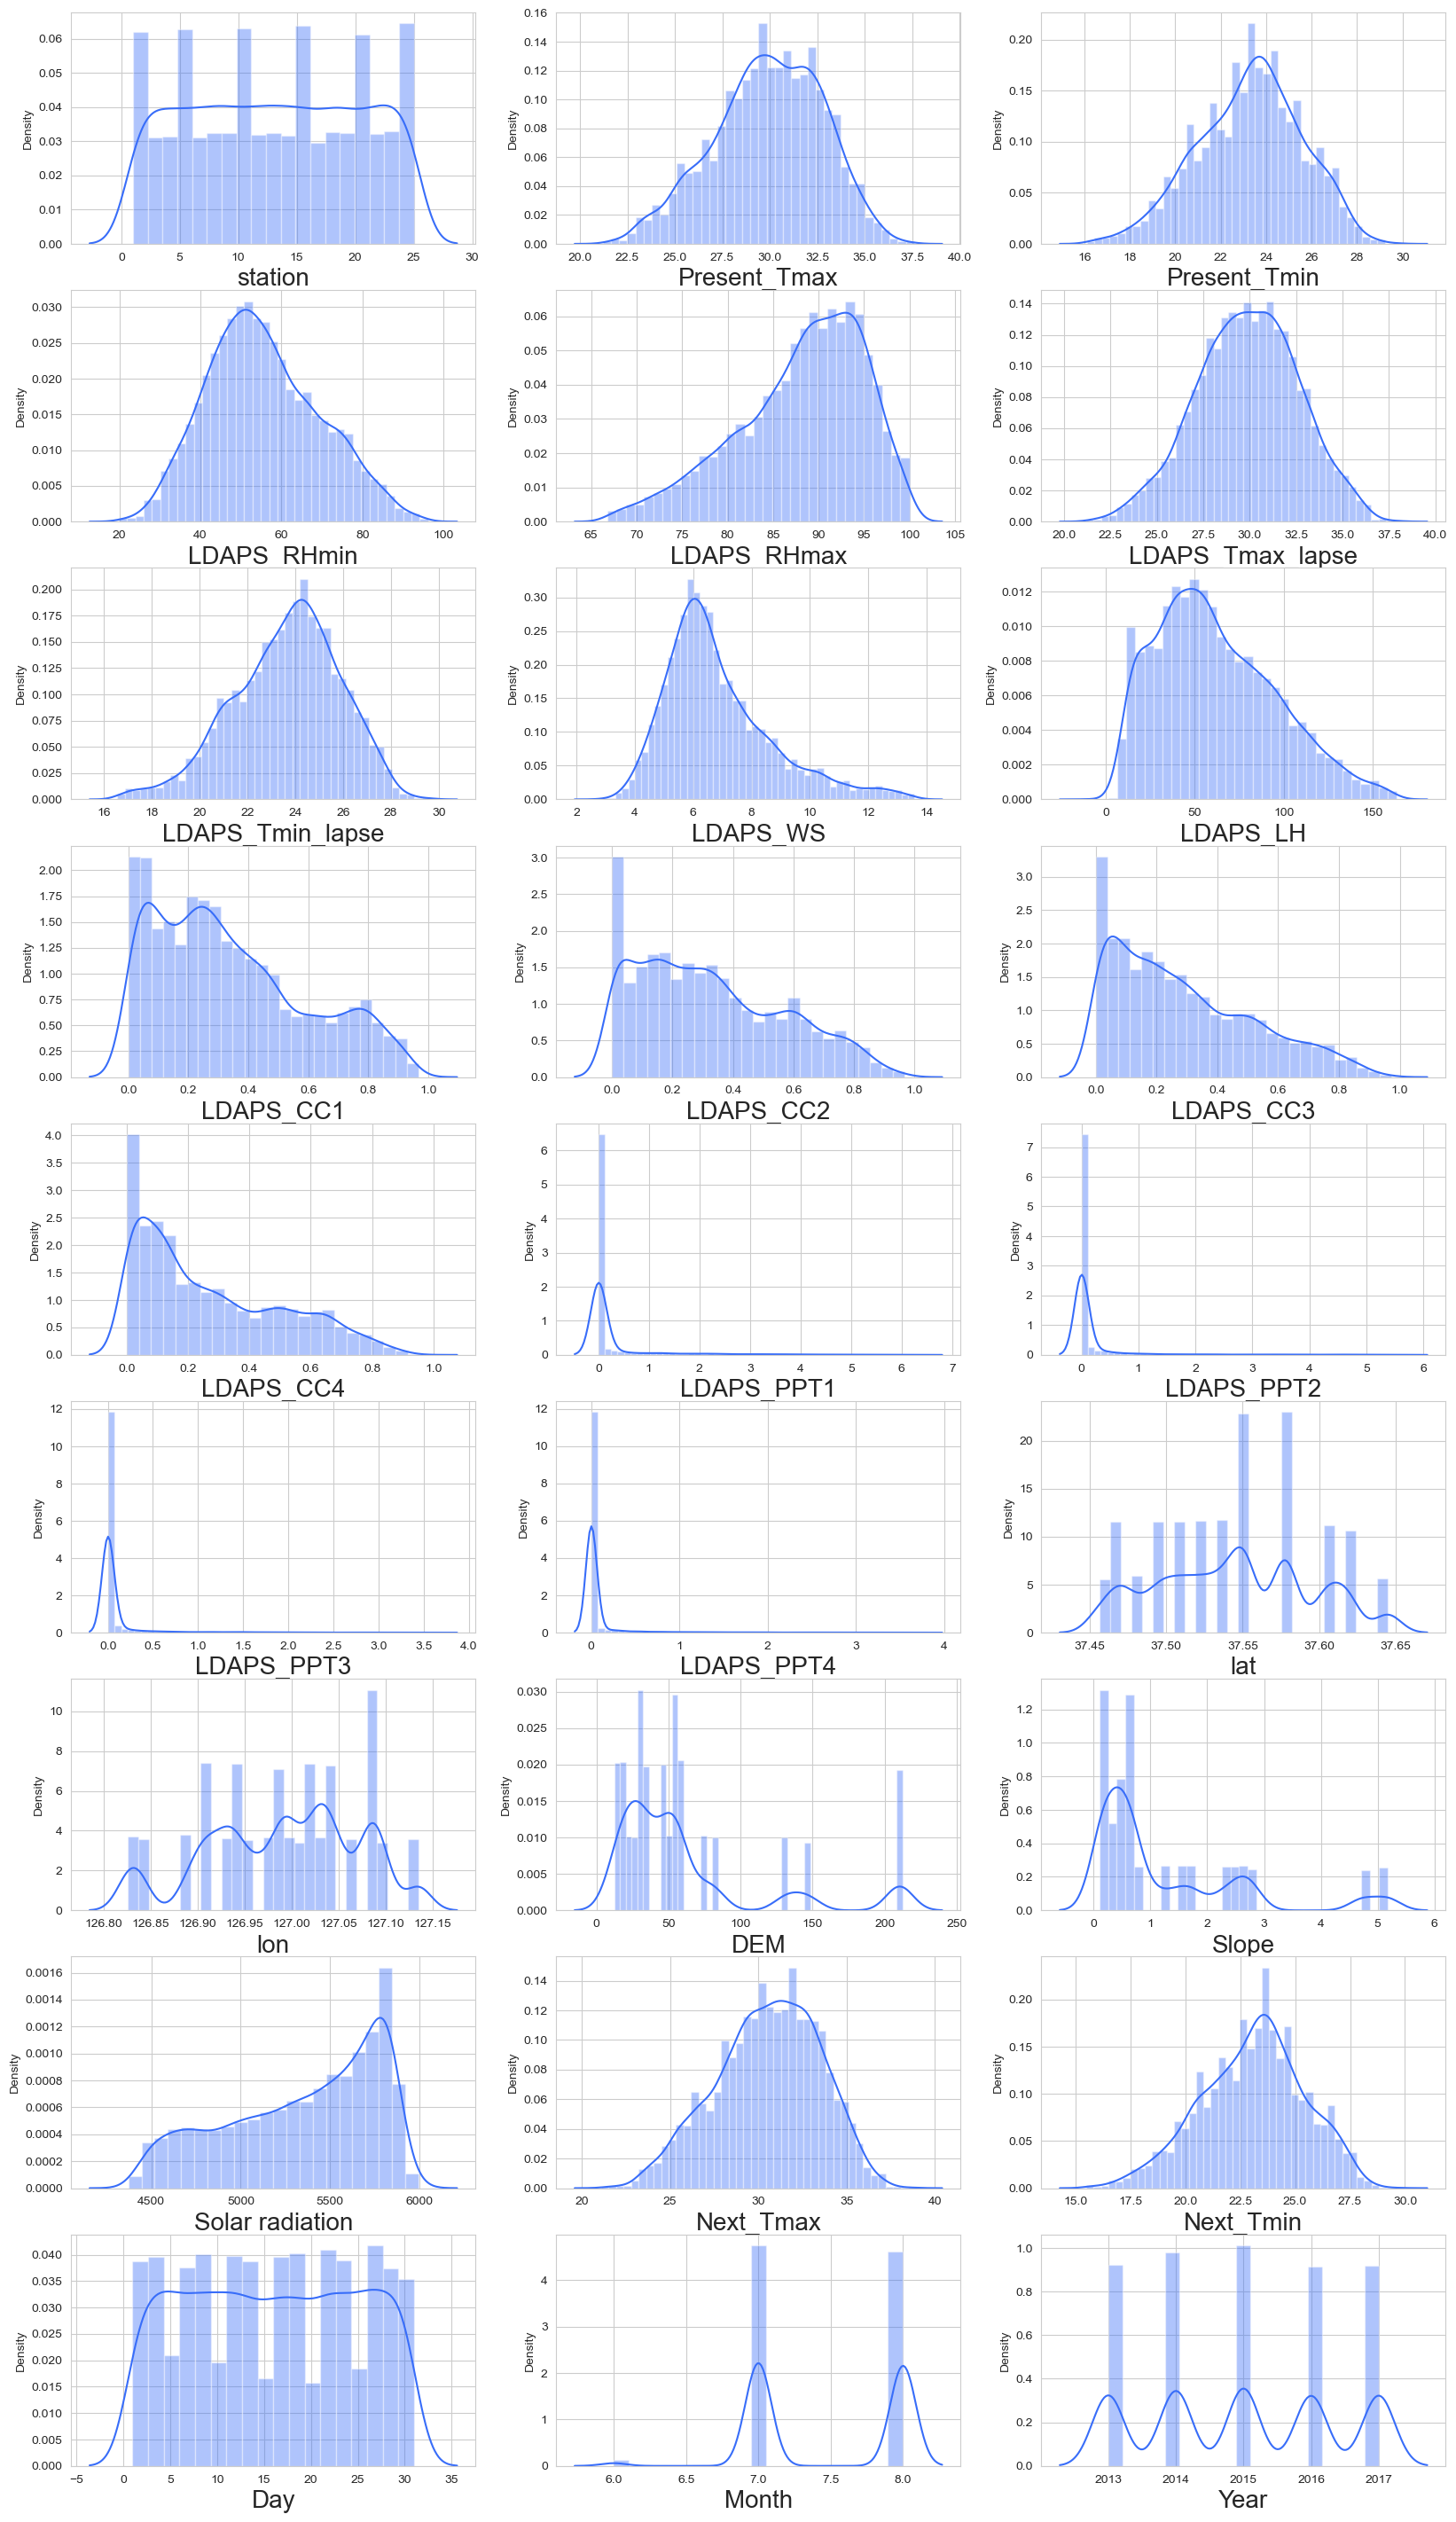

In [153]:
#Skewness of features
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [154]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
dtype: float64

In [155]:
#from the above graph and chahrt we can say some are positively skewed and oters are negatively skewed so we use yeo-johnson method to solve skewness nature

In [156]:
#making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)

In [157]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.087154
Year                0.025066
dtype: float64

In [158]:
#Corrleation
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005032     -0.130708     -0.082712    -0.073118   
Month             0.011309      0.171614      0.104576    -0.183976   
Year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.205979   
Next_Tmin           -0.110402          0.553227          0.873678  0.023330   
Day                 -0.014136         -0.139339        

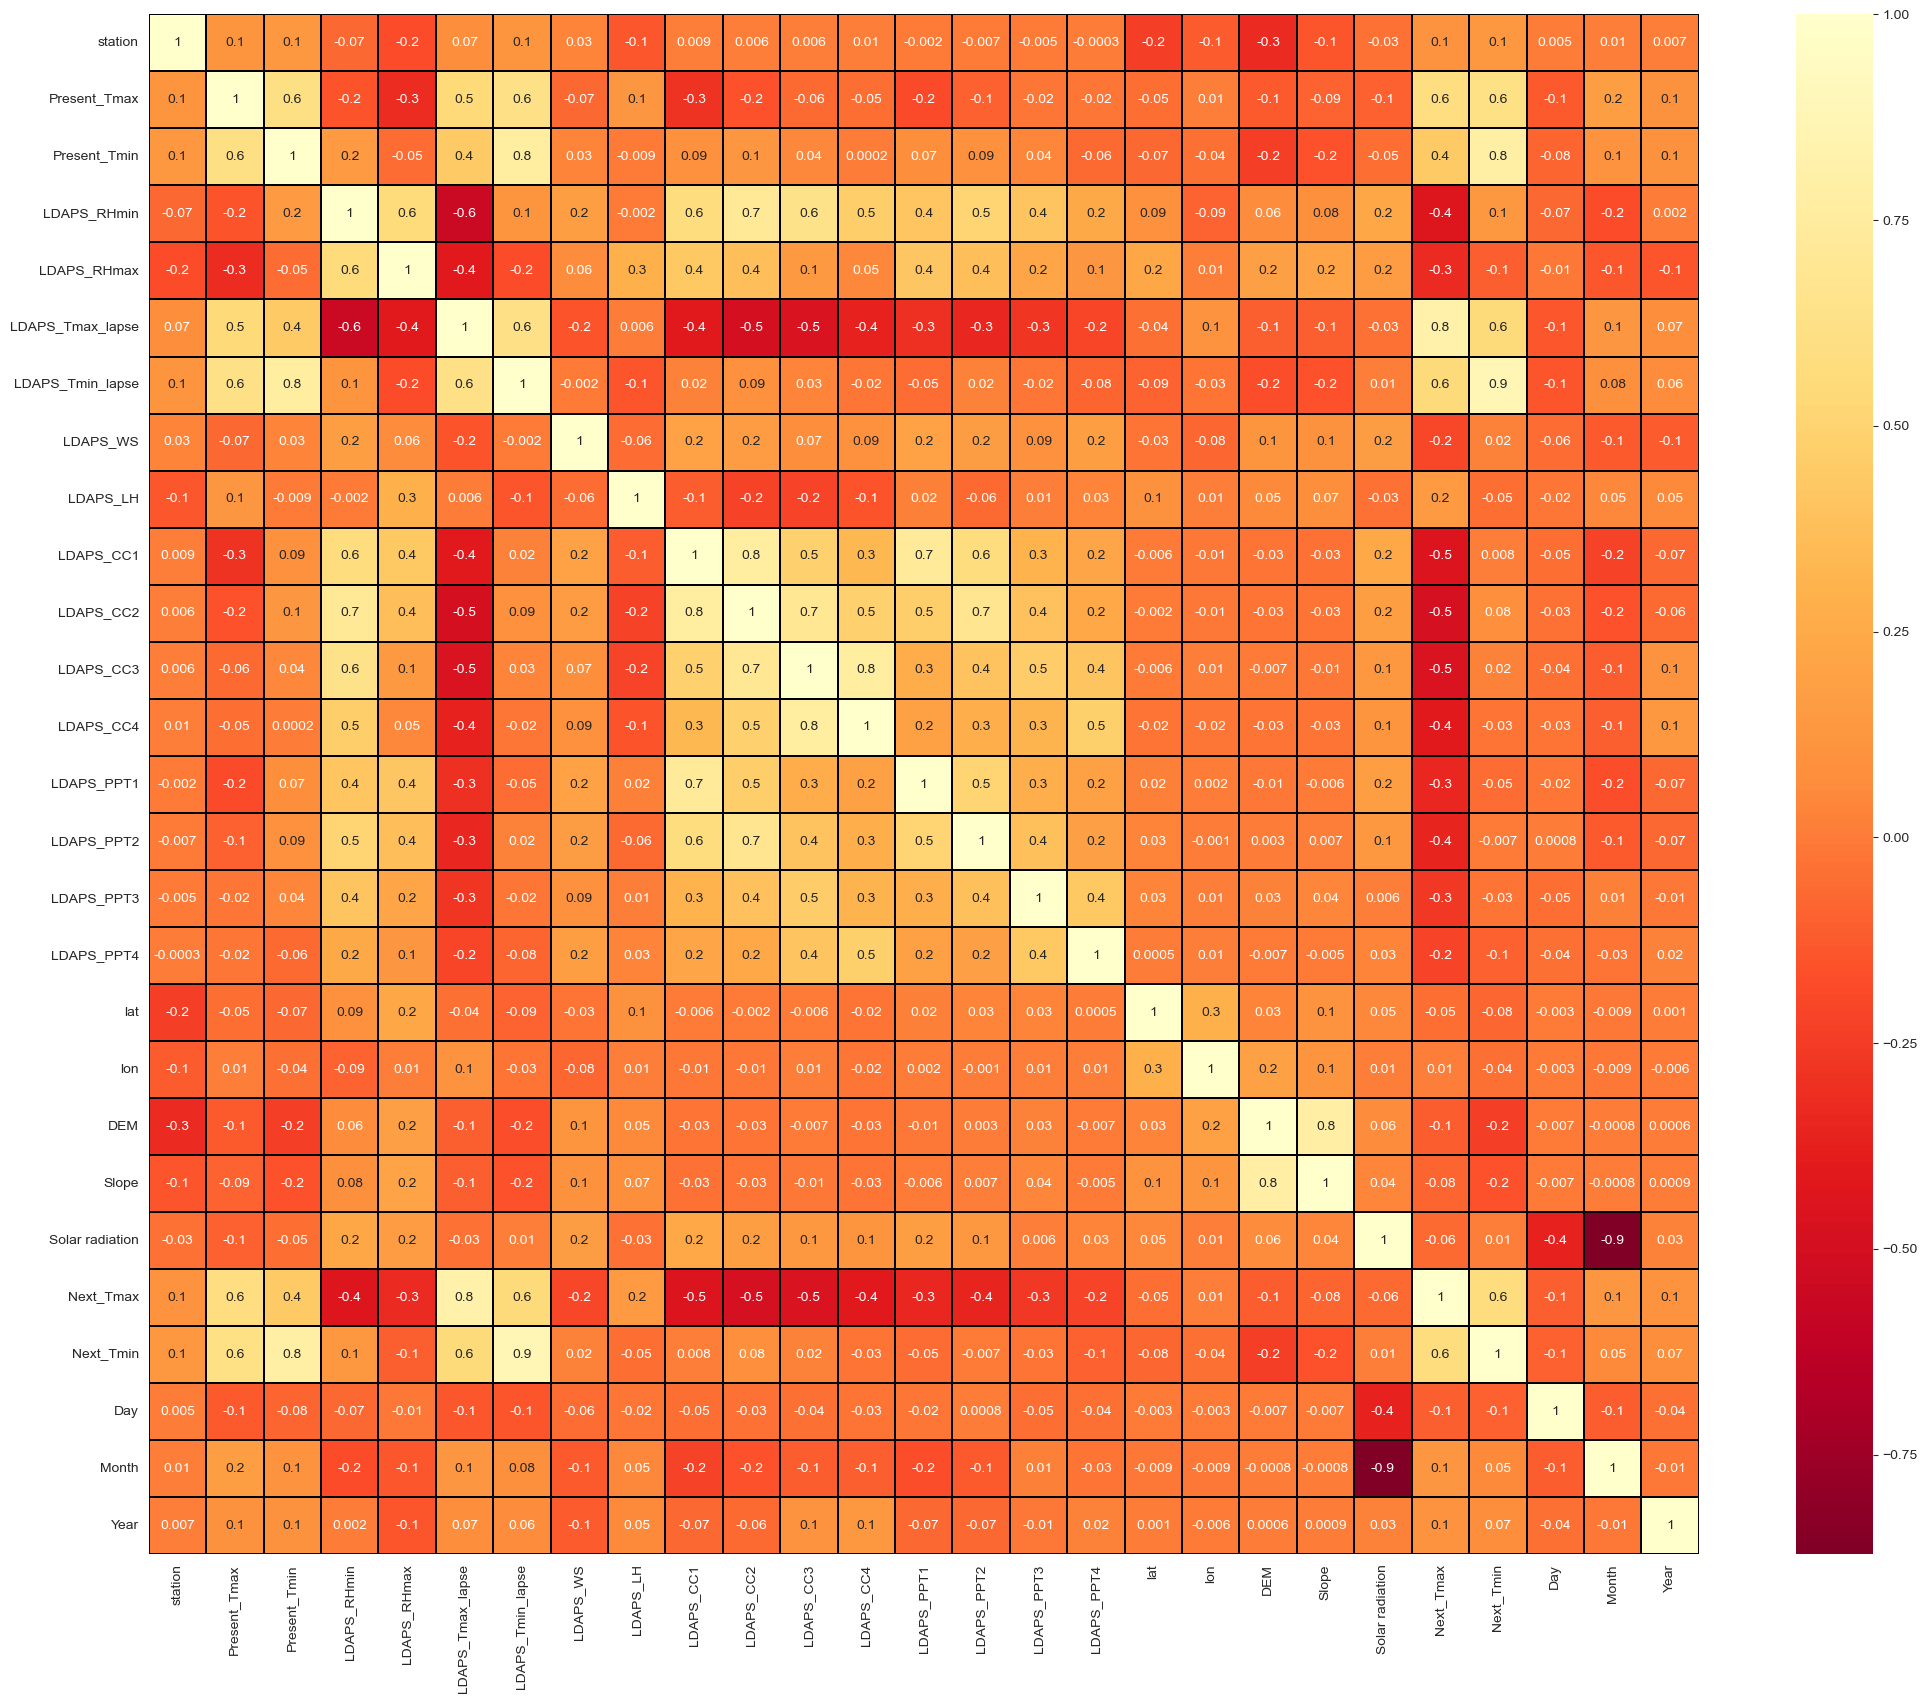

In [159]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="YlOrRd_r")
plt.yticks(rotation=0);
plt.show()

In [160]:
#Temperature and cloud cover related feature are moderately or highly correlated with Target Feature


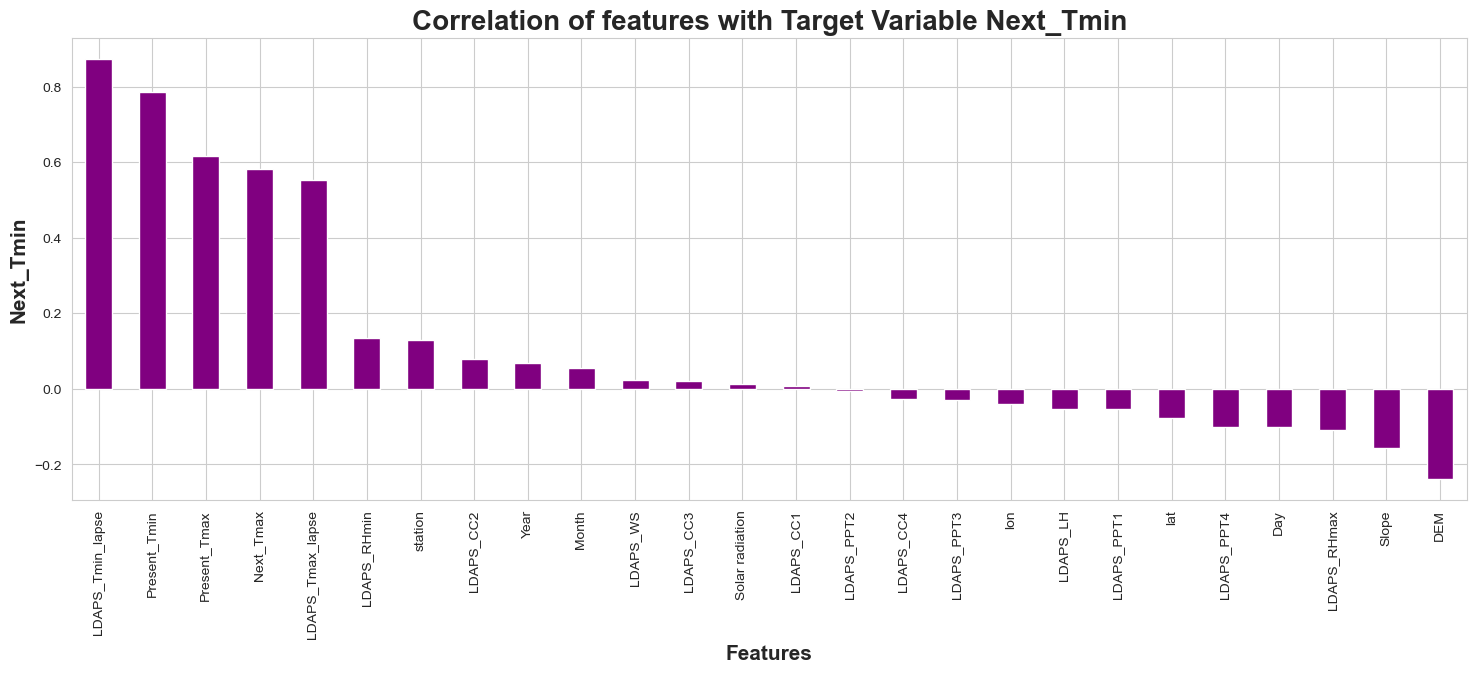

In [161]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

In [162]:
#Temperature related feature are moderately or highly correlated with Target Feature

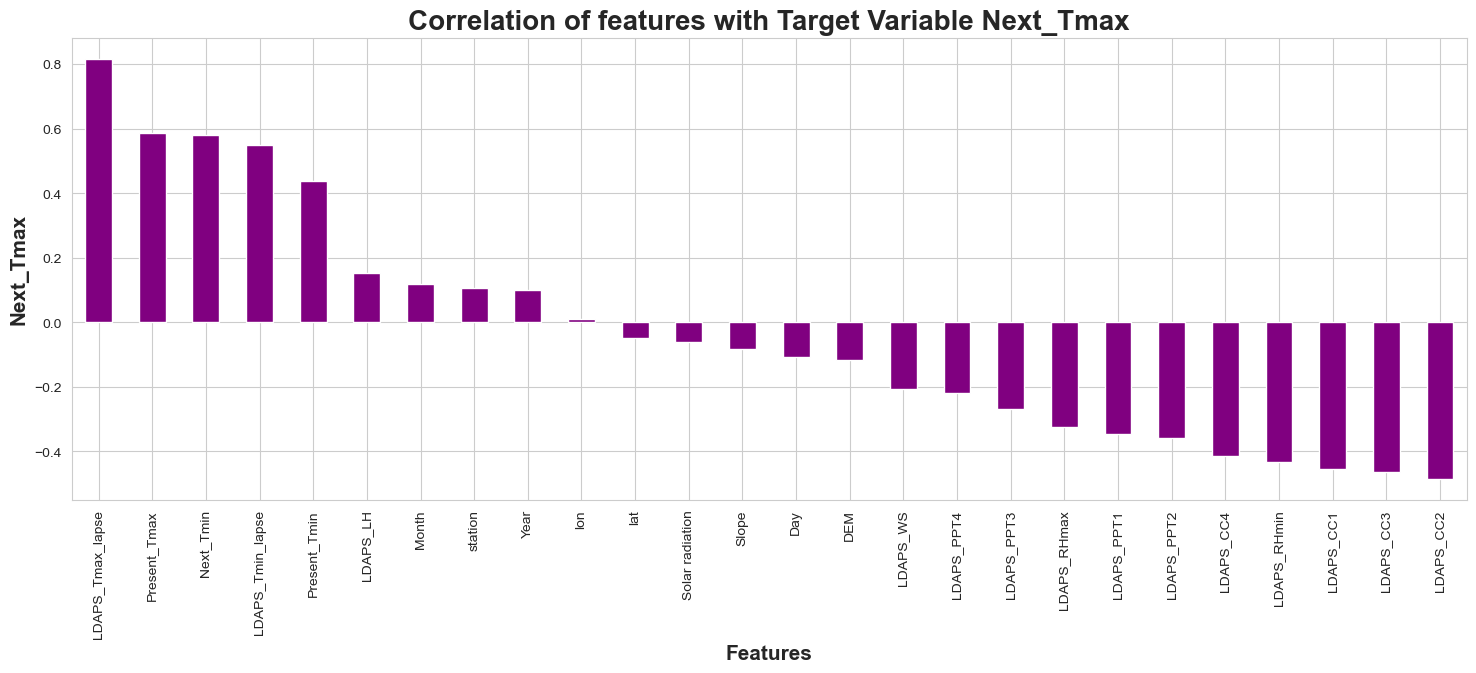

In [163]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

In [164]:
#Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.


# Machine Learning Model Building For Next_Tmax

In [165]:

# Splitting data in target and dependent feature
x = df.drop(['Next_Tmax'], axis =1)
y = df['Next_Tmax']

In [168]:
#Checking Multicollinearity between features using variance_inflation_factor

In [166]:
vif=pd.DataFrame()
vif["Vif Values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

Vif Values          Features
0   5.584300e+00           station
1   3.187181e+02      Present_Tmax
2   3.481213e+02      Present_Tmin
3   1.033660e+02       LDAPS_RHmin
4   2.600756e+00       LDAPS_RHmax
5   7.777242e+02  LDAPS_Tmax_lapse
6   8.185394e+00  LDAPS_Tmin_lapse
7   1.214204e+00          LDAPS_WS
8   1.510063e+00          LDAPS_LH
9   1.400473e+01         LDAPS_CC1
10  1.587511e+01         LDAPS_CC2
11  4.489967e+00         LDAPS_CC3
12  2.786774e+00         LDAPS_CC4
13  2.601467e+00        LDAPS_PPT1
14  2.167872e+00        LDAPS_PPT2
15  1.599019e+00        LDAPS_PPT3
16  1.602097e+00        LDAPS_PPT4
17  8.976419e+05               lat
18  1.834885e+06               lon
19  4.574272e+00               DEM
20  3.081835e+00             Slope
21  1.273088e+02   Solar radiation
22  5.466634e+02         Next_Tmin
23  1.237223e+02               Day
24  1.095477e+02             Month
25  1.292355e+06              Year

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [173]:
#finding gthe best random state

In [174]:
#Linear Regression
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"Random_state ",maxRs)

Maximum r2 score is  0.8074113032617198 Random_state  108


In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

# classificatoion of algorithm

In [176]:
#LINEAR REGRESSION
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_LR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean squared Error:",mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:  0.8074113032617198
R2_score on training Data: 78.34971303896943
Mean Absolute Error: 0.9951545261833153
Mean squared Error: 1.698605670089441
Root mean squared error: 1.3033056702437233


In [177]:
#RIDGE
from sklearn.linear_model import Ridge
RD=Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_train=RD.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_RD))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RD))
print("Mean squared Error:",mean_squared_error(y_test,pred_RD))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RD)))

R2_score:  0.8072300788035893
R2_score on training Data: 78.34429059494946
Mean Absolute Error: 0.9959976914368303
Mean squared Error: 1.700204044746691
Root mean squared error: 1.3039187262811631


In [179]:
#SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared Error:",mean_squared_error(y_test,pred_svr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score:  0.05793663194017851
R2_score on training Data: 5.43638159649894
Mean Absolute Error: 2.3468310315649714
Mean squared Error: 8.308868618310264
Root mean squared error: 2.882510818420334


In [180]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_RFR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RFR))
print("Mean squared Error:",mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.9007705361815979
R2_score on training Data: 98.5496914939852
Mean Absolute Error: 0.7024925816023743
Mean squared Error: 0.875190147378833
Root mean squared error: 0.935515979221538


In [181]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_DTR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_DTR))
print("Mean squared Error:",mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score:  0.7644456403964685
R2_score on training Data: 100.0
Mean Absolute Error: 1.043026706231454
Mean squared Error: 2.0775568743818003
Root mean squared error: 1.4413732599093825


In [182]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_GBR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_GBR))
print("Mean squared Error:",mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:  0.8678385092588667
R2_score on training Data: 88.37081378535777
Mean Absolute Error: 0.8318188938710092
Mean squared Error: 1.1656460703165494
Root mean squared error: 1.0796509020588783


In [183]:
#we can say RandomForestRegressor is the best model with r2_score is 0.9007705361815979 and R2_score on training Data: 98.5496914939852
# but we need to check cross validation for final prediction

# cross validation checking

In [184]:
#checking  Cross Validation score for liner regression
from sklearn.model_selection import cross_val_score
score1=cross_val_score(LR,x,y,)
print(score1)
print(score1.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_LR)-score1.mean())

[0.67684166 0.6846022  0.68339839 0.77323599 0.58315995]
0.6802476385180667
Difference between R2 Score and Cross validation score is -  0.12716366474365315


In [185]:
#checking  Cross Validation score for Ridge
score2=cross_val_score(RD,x,y,)
print(score2)
print(score2.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_RD)-score2.mean())

[0.6819479  0.68414086 0.684894   0.77211267 0.58161164]
0.6809414143883131
Difference between R2 Score and Cross validation score is -  0.1262886644152762


In [186]:
#checking  Cross Validation score for SVR
score3=cross_val_score(svr,x,y,)
print(score3)
print(score3.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_svr)-score3.mean())

[ 0.07287197 -0.17423578  0.05088911 -0.13954928  0.02980319]
-0.03204415572476675
Difference between R2 Score and Cross validation score is -  0.08998078766494526


In [188]:
#checking  Cross Validation score for RandomForestRegressor
score4=cross_val_score(RFR,x,y,)
print(score4)
print(score4.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_RFR)-score4.mean())

[0.75090429 0.67393161 0.67609405 0.73258303 0.61795317]
0.6902932274757937
Difference between R2 Score and Cross validation score is -  0.21047730870580417


In [190]:
#checking  Cross Validation score for DecisionTreeRegressor
score5=cross_val_score(DTR,x,y,)
print(score5)
print(score5.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_DTR)-score5.mean())

[0.41929387 0.4210451  0.36550551 0.49350642 0.34253107]
0.40837639397835684
Difference between R2 Score and Cross validation score is -  0.3560692464181116


In [191]:
#checking  Cross Validation score for GradientBoostingRegressor
score6=cross_val_score(GBR,x,y,)
print(score6)
print(score6.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_GBR)-score6.mean())

[0.74893365 0.66245253 0.69978188 0.783946   0.6434638 ]
0.7077155711578218
Difference between R2 Score and Cross validation score is -  0.16012293810104494


In [192]:
#from the difference of r2 score and cross validation we can say GradientBoostingRegressor is the best performing model

In [193]:
# hyper parameter turning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[20,50,100],
           'criterion':['friedman_mse','squared_error'],
           'max_depth':[1,3,5],
            'random_state':[1,5,10]
            }
            
gscv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 3, 5], 'n_estimators': [20, 50, 100],
                         'random_state': [1, 5, 10]})

In [194]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'n_estimators': 100,
 'random_state': 5}

In [197]:
#check modell again with parameters to get best performance
f_model=GradientBoostingRegressor(criterion='squared_error',max_depth=5,n_estimators=100,random_state=5)
f_model=SVR(C=2.0,gamma='scale',kernel='rbf')
f_model.fit(x_train,y_train)
pred=f_model.predict(x_test)

print("R2 score :", r2_score(y_test,pred))
print("Mean absolute error ",mean_absolute_error(y_test,pred))
print("Mean squared error ",mean_squared_error(y_test,pred))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred)))

R2 score : 0.10750289286437043
Mean absolute error  2.2853451160361193
Mean squared error  7.87170105200506
Root mean squared error  2.805655191217385


<Axes: xlabel='Next_Tmax', ylabel='Density'>

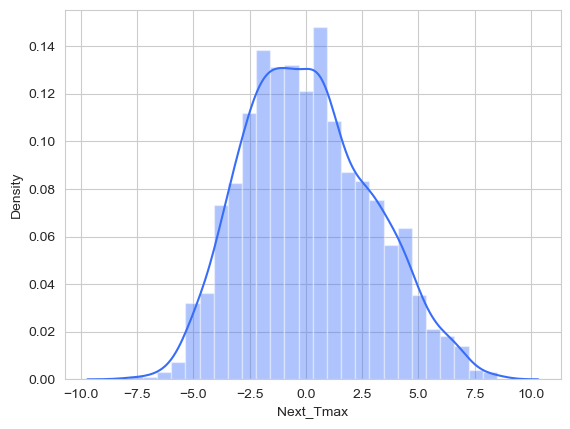

In [198]:
sns.distplot(pred-y_test)

In [200]:
# Saving the model
import joblib
joblib.dump(f_model,"Temperature_forecast_maximum.pkl")

['Temperature_forecast_maximum.pkl']

In [201]:
#predicting the saved model
model=joblib.load("Temperature_forecast_maximum.pkl")
a=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
a

0         1          2          3          4          5     \
predicted  30.649798  30.77523  30.735931  30.361554  30.661887  30.946016   
original   32.000000  30.10000  27.800000  27.600000  29.800000  33.000000   

                6          7          8          9     ...       2012  \
predicted  30.795932  31.036798  31.160971  30.566674  ...  30.642127   
original   29.000000  32.400000  32.300000  28.400000  ...  30.300000   

                2013       2014       2015       2016       2017       2018  \
predicted  30.733381  31.019403  30.292195  31.048933  30.916868  30.633739   
original   26.400000  35.600000  28.200000  34.700000  30.200000  31.600000   

                2019       2020       2021  
predicted  29.902093  30.382897  30.912171  
original   25.700000  35.100000  33.300000  

[2 rows x 2022 columns]

# Machine Learning Model Building For Next_Tmin

In [203]:
# Splitting data in target and dependent feature
x= df.drop(['Next_Tmin'], axis =1)
y= df['Next_Tmin']

# Finding best Random state

In [204]:
#Linear Regression
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"Random_state ",maxRs)

Maximum r2 score is  0.8515609905638533 Random_state  176


In [205]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

# classificatoion of algorithm

In [206]:
#LINEAR REGRESSION
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_LR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean squared Error:",mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:  0.8515609905638533
R2_score on training Data: 83.5900491415554
Mean Absolute Error: 0.7338239598919328
Mean squared Error: 0.8626228901591824
Root mean squared error: 0.9287749405314413


In [207]:
#RIDGE
from sklearn.linear_model import Ridge
RD=Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_train=RD.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_RD))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RD))
print("Mean squared Error:",mean_squared_error(y_test,pred_RD))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RD)))

R2_score:  0.851433332378262
R2_score on training Data: 83.58667788230454
Mean Absolute Error: 0.7343682626187323
Mean squared Error: 0.8633647495492809
Root mean squared error: 0.9291742299209986


In [208]:
#SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared Error:",mean_squared_error(y_test,pred_svr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score:  0.018244032551684386
R2_score on training Data: 2.110088157905776
Mean Absolute Error: 1.896886310736178
Mean squared Error: 5.705273656084253
Root mean squared error: 2.388571467652633


In [209]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_RFR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RFR))
print("Mean squared Error:",mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.9097673187063682
R2_score on training Data: 98.59327876653452
Mean Absolute Error: 0.549792284866469
Mean squared Error: 0.5243687398615234
Root mean squared error: 0.724133095405481


In [210]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_DTR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_DTR))
print("Mean squared Error:",mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score:  0.7936817460218415
R2_score on training Data: 100.0
Mean Absolute Error: 0.8268545994065283
Mean squared Error: 1.1989762611275965
Root mean squared error: 1.0949777445809556


In [211]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)

print("R2_score: ",r2_score(y_test,pred_GBR))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_GBR))
print("Mean squared Error:",mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:  0.9014008947226736
R2_score on training Data: 91.03863710138502
Mean Absolute Error: 0.5912380442452865
Mean squared Error: 0.5729884986737527
Root mean squared error: 0.7569600376993179


In [212]:
#we can say RandomForestRegressor is the best model with r2_score is0.90976731870636829 and R2_score on training Data: 98.59327876653452
# but we need to check cross validation for final prediction

# cross validation checking

In [213]:
#checking  Cross Validation score for liner regression
from sklearn.model_selection import cross_val_score
score1=cross_val_score(LR,x,y,)
print(score1)
print(score1.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_LR)-score1.mean())

[0.75743627 0.67407187 0.79322917 0.86926946 0.86644208]
0.7920897701280664
Difference between R2 Score and Cross validation score is -  0.0594712204357869


In [214]:
#checking  Cross Validation score for Ridge
score2=cross_val_score(RD,x,y,)
print(score2)
print(score2.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_RD)-score2.mean())

[0.75698443 0.67393355 0.7939322  0.86941435 0.86650042]
0.7921529888490422
Difference between R2 Score and Cross validation score is -  0.05928034352921985


In [215]:
#checking  Cross Validation score for SVR
score3=cross_val_score(svr,x,y,)
print(score3)
print(score3.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_svr)-score3.mean())

[-0.07108357 -0.49866378 -0.06404258 -0.01762375  0.02789339]
-0.12470405795148079
Difference between R2 Score and Cross validation score is -  0.14294809050316518


In [216]:
#checking  Cross Validation score for RandomForestRegressor
score4=cross_val_score(RFR,x,y,)
print(score4)
print(score4.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_RFR)-score4.mean())

[0.71908128 0.6983786  0.80887232 0.87706993 0.85629834]
0.7919400941950716
Difference between R2 Score and Cross validation score is -  0.11782722451129657


In [217]:
#checking  Cross Validation score for DecisionTreeRegressor
score5=cross_val_score(DTR,x,y,)
print(score5)
print(score5.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_DTR)-score5.mean())

[0.46135286 0.45657929 0.62543004 0.75635689 0.66940648]
0.5938251122078178
Difference between R2 Score and Cross validation score is -  0.19985663381402374


In [218]:
#checking  Cross Validation score for GradientBoostingRegressor
score6=cross_val_score(GBR,x,y,)
print(score6)
print(score6.mean())
print("Difference between R2 Score and Cross validation score is - ",r2_score(y_test,pred_GBR)-score6.mean())

[0.73934634 0.69149869 0.81879331 0.88336617 0.88373339]
0.8033475802915211
Difference between R2 Score and Cross validation score is -  0.0980533144311525


In [219]:
#from the difference of r2 score and cross validation we can say GradientBoostingRegressor is the best performing model

In [220]:
# hyper parameter turning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[20,50,100],
           'criterion':['friedman_mse','squared_error'],
           'max_depth':[1,3,5],
            'random_state':[1,5,10]
            }
            
gscv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 3, 5], 'n_estimators': [20, 50, 100],
                         'random_state': [1, 5, 10]})

In [221]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'n_estimators': 100,
 'random_state': 1}

In [223]:
#check modell again with parameters to get best performance
f_model=GradientBoostingRegressor(criterion='squared_error',max_depth=5,n_estimators=100,random_state=1)
f_model=SVR(C=2.0,gamma='scale',kernel='rbf')
f_model.fit(x_train,y_train)
pred=f_model.predict(x_test)
print("R2 score :", r2_score(y_test,pred))
print("Mean absolute error ",mean_absolute_error(y_test,pred))
print("Mean squared error ",mean_squared_error(y_test,pred))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred)))

R2 score : 0.043232448535089674
Mean absolute error  1.872855803925781
Mean squared error  5.560058596390815
Root mean squared error  2.3579776496800844


<Axes: xlabel='Next_Tmin', ylabel='Density'>

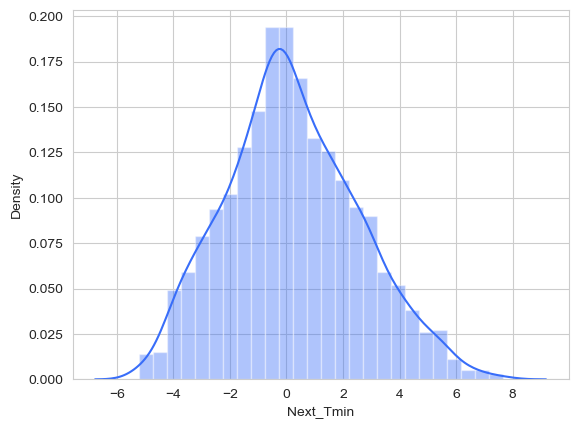

In [224]:
sns.distplot(pred-y_test)

In [226]:
# Saving the model
import joblib
joblib.dump(f_model,"Temperature_forecast_minimum.pkl")

['Temperature_forecast_minimum.pkl']

In [228]:
#predicting the saved model
model=joblib.load("Temperature_forecast_minimum.pkl")
a=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
a

0         1          2          3          4          5     \
predicted  23.344097  23.24311  23.335637  23.249512  23.125582  23.191298   
original   26.300000  23.00000  25.400000  24.600000  15.500000  23.500000   

                6         7          8          9     ...       2012  \
predicted  23.320984  23.34306  23.037371  23.126997  ...  23.167217   
original   26.400000  25.30000  20.800000  21.000000  ...  20.400000   

                2013       2014       2015       2016       2017       2018  \
predicted  23.130582  23.285162  23.152959  23.337008  23.141256  23.238028   
original   19.600000  27.000000  23.300000  27.300000  23.200000  21.700000   

              2019       2020     2021  
predicted  23.2314  23.211372  22.9127  
original   22.8000  22.500000  16.0000  

[2 rows x 2022 columns]